# Momento evaluativo 3

Seminario <br>
Especialización en Analítica y Ciencia de Datos <br>
Universidad de Antioquia <br>
Noviembre 2023 <br>

Julieth Tatiana García Zuluaga - Grupo 12

# Decripción del dataset

El siguiente dataset es una extracción de la base de datos del foro de discusión de una empresa. Sus campos se seleccionaron de acuerdo al objetivo de realizar una segmentación de los usuarios de la aplicación según su comportamiento en el foro.

| Campo | Descripción | 
| :--- | :--- |
| username | Nombre de usuario en la aplicación |
| trust_level | Nivel de confianza del usuario en la aplicación |
| topics_entered | Temas ingresados por el usuario en el foro |  
| time_read | Tiempo de lectura del usuario en el foro |
| days_visited | Cantidad de días que ha visitado el foro |
| post_read_count | Cantidad de posts leídos en el foro |
| likes_given | Me gusta dados por el usuario en el foro |
| likes_received | Me gusta recibidos por el usuario en el foro |
| new_since | Fecha de creación del usuario en el foro |
| post_count | Cantidad de post realizados por el usuario |
| topic_count | Cantidad de temas realizas por el usuario |
| user_custom_field | Campo personalizado por el usuario en el foro |
| like_count | Cantidad de me gusta en los post del usuario en el foro |
| score | Puntaje del usuario por su participación en el foro |
| reads | Número de lecturas que ha recibido el usuario en el foro |
| word_count | Cantidad de palabras que contiene el post realizado por el usuario en el foro |
| image_upload_id | ID de la imagen insertada (Si aplica) |
| topic | Tema del post realizado por el usuario en el foro |
| category | Categoria del tema posteado por el usuario en el foro |
| category_description | Descripción de la categoría del temas posteado por el usuario en el foro |
| tag | Etiqueta otorgada al post por el sistema en el foro |
| given_date_likes | Fecha del me gusta otorgadao |
| post | Descripción del post publicado por el usuario en el foro |
| archetype | Arquetipo del tema |

Resumen de las características:
- Instancias: 2.949
- Columnas: 24
- Objetivo: Segmentación o clusterización de usuarios
***


# Objetivo

Segmentar y clasificar a los usuarios que utilizan la herramienta de foro de discusión en la Vicepresidencia de Tecnología de la empresa.

# Librerías

In [45]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Matemáticas y estadísticas
# ==============================================================================
import math

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración de warnings
import warnings
warnings.filterwarnings('ignore')

# Funciones

In [46]:
# Función para graficar un plot con multiples gráficas del mismo tipo:
#
# df       : dataframe 
# cols     : lista de columnas a graficar
# num_cols : número de columnas 
# num_rows : número de filas
# tipo     : 'c' = countplot,   'b' = boxplot, 's' = scatterplot 
# targetVar: nombre de la variable comparativa de salida. Debe ser numérica y debe estar cotenida en el dataframe. 
#            Para countplot no es necesario (None)
# figsize  : tamaño del plot. Valor por defecto (16,8)
#
# *Nota: el número de filas * el número de columnas debe ser mayor al total de elementos de cols
#
# Ejemplos:     
#    plot_multiples_graficas (d, catCols, 5, 3, 'c', None, (16,12))
#    plot_multiples_graficas (d, numCols, 5, 3, 's', 'price', (16,12))
#    plot_multiples_graficas (d, ['make'], 1, 1, 'b', 'price', (16,12))
# ==============================================================================


def plot_multiples_graficas(df, cols, num_cols, num_rows, tipo, targetVar, figsize=(16,8)):
    
    plt.rcParams['figure.figsize'] = figsize
    
    #num_plots = len(cols)
    #num_cols = math.ceil(np.sqrt(num_plots))
    #num_rows = math.ceil(num_plots/num_cols)
        
    fig, axs = plt.subplots(num_rows, num_cols)
     
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
        
        if num_rows == 1:
            if num_cols == 1:
                if tipo == 'c': 
                    sns.countplot(x=df[col], ax=axs, dodge = False)
                    axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs)
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs)
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[j])
        else:
            if num_cols == 1: 
                if tipo == 'c':
                    sns.countplot(x=d[col], ax=axs[i], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i])
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[i, j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i, j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i, j])

# Cargar dataset

In [47]:
# Vista preliminar del data set
data = pd.read_csv('https://raw.githubusercontent.com/TatianaGarcia1128/foro_discusion_udea/main/dataset_users.csv')
data.head()

,username,trust_level,topics_entered,time_read,days_visited,posts_read_count,likes_given,likes_received,new_since,post_count,...,reads,word_count,image_upload_id,topic,category,category_description,tag,given_date,post,archetype
0,yvarela,4,520,81584,168,1259,71,61,2022-07-19 15:51:12.780824,27,...,94,107,NaN,Acerca de la categoría DevSecOps,DevSecOps,Te invitamos a contribuir al proceso <strong>D...,continuous-compliance,2022-10-28,Te invitamos a contribuir al proceso **DevSecO...,regular
1,ddurango,4,59,8999,65,119,9,12,2022-07-19 13:45:13.649354,13,...,44,87,NaN,Acerca de la categoría Galatea,Galatea,NaN,microfrontends,2022-09-29,(Sustituye este párrafo con una descripción co...,regular
2,ddurango,4,59,8999,65,119,9,12,2022-07-19 13:45:13.649354,13,...,44,87,NaN,Acerca de la categoría Galatea,Galatea,NaN,distribution-router,2022-07-25,(Sustituye este párrafo con una descripción co...,regular
3,ddurango,4,59,8999,65,119,9,12,2022-07-19 13:45:13.649354,13,...,44,87,NaN,Acerca de la categoría Galatea,Galatea,NaN,figma,2022-09-16,(Sustituye este párrafo con una descripción co...,regular
4,yvarela,4,520,81584,168,1259,71,61,2022-07-19 15:51:12.780824,27,...,94,107,NaN,Acerca de la categoría DevSecOps,DevSecOps,Te invitamos a contribuir al proceso <strong>D...,angular,2022-07-27,Te invitamos a contribuir al proceso **DevSecO...,regular


In [48]:
data.shape

(2949, 24)

In [49]:
# Revisar nulos, tipo de datos en cada variable y tamaño de la base de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2949 entries, 0 to 2948
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   username              2949 non-null   object 
 1   trust_level           2949 non-null   int64  
 2   topics_entered        2949 non-null   int64  
 3   time_read             2949 non-null   int64  
 4   days_visited          2949 non-null   int64  
 5   posts_read_count      2949 non-null   int64  
 6   likes_given           2949 non-null   int64  
 7   likes_received        2949 non-null   int64  
 8   new_since             2949 non-null   object 
 9   post_count            2949 non-null   int64  
 10  topic_count           2949 non-null   int64  
 11  user_custom_field     2949 non-null   object 
 12  like_count            2949 non-null   int64  
 13  score                 2949 non-null   float64
 14  reads                 2949 non-null   int64  
 15  word_count           

El data set contiene 2949 instancias y 24 columnas, de las cuales 12 tienen valores tipo entero (int64), 2 de tipo decimal (float64) y las 10 restantes son tipo object. De acuerdo con la información mostrada, existen valores nulos en las variables 'image_upload_id' y 'category_description'. Además, la base de datos ocupa 553.1+ KB, y es fácil de procesar.

In [50]:
# Estadística descriptiva de las variables númericas
data.describe()

,trust_level,topics_entered,time_read,days_visited,posts_read_count,likes_given,likes_received,post_count,topic_count,like_count,score,reads,word_count,image_upload_id
count,2949.000000,2949.000000,2949.000000,2949.000000,2949.000000,2949.000000,2949.000000,2949.000000,2949.000000,2949.000000,2949.000000,2949.000000,2949.000000,0.0
mean,3.886063,357.735504,55816.559512,130.492370,858.820956,48.721261,43.354018,21.616480,14.730417,1.944049,51.005697,76.846389,99.960326,NaN
std,0.463643,220.205834,34978.531139,51.127422,543.090681,30.284533,23.995819,7.512162,7.270474,1.433010,30.944385,23.619650,9.553398,NaN
min,2.000000,59.000000,5160.000000,43.000000,119.000000,1.000000,5.000000,5.000000,0.000000,0.000000,6.400000,33.000000,87.000000,NaN
25%,4.000000,59.000000,8999.000000,65.000000,119.000000,9.000000,12.000000,13.000000,6.000000,0.000000,8.800000,44.000000,87.000000,NaN
50%,4.000000,520.000000,81584.000000,168.000000,1259.000000,71.000000,61.000000,27.000000,20.000000,3.000000,73.800000,94.000000,107.000000,NaN
75%,4.000000,520.000000,81584.000000,168.000000,1259.000000,71.000000,61.000000,27.000000,20.000000,3.000000,73.800000,94.000000,107.000000,NaN
max,4.000000,520.000000,81584.000000,168.000000,1259.000000,71.000000,61.000000,27.000000,20.000000,3.000000,73.800000,94.000000,107.000000,NaN


Se puede observar que se tienen escalas diferentes por lo que posiblemente se requiera una estandarización de la información.

# Data cleaning

Se elima la columna 'imagen_upload_id' ya que de acuerdo a la consulta de los campos, no contiene información'.

In [51]:
data.drop(['image_upload_id'], axis='columns', inplace=True)
data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2949 entries, 0 to 2948
Columns: 23 entries, username to archetype
dtypes: float64(1), int64(12), object(10)
memory usage: 530.0+ KB


Se elimina la columna 'username' ya que no aporta al modelo.

In [52]:
data.drop(['username'], axis='columns', inplace=True)
data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2949 entries, 0 to 2948
Columns: 22 entries, trust_level to archetype
dtypes: float64(1), int64(12), object(9)
memory usage: 507.0+ KB


Se elimina la columna 'archetype' ya que contiene solo la categoría 'regular'.

In [53]:
data.drop(['archetype'], axis='columns', inplace=True)
data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2949 entries, 0 to 2948
Columns: 21 entries, trust_level to post
dtypes: float64(1), int64(12), object(8)
memory usage: 483.9+ KB


 Ahora solo presenta valores nulos la variable 'category_description'.

In [54]:
# Verificar registros duplicados
data.loc[data.duplicated()]

,trust_level,topics_entered,time_read,days_visited,posts_read_count,likes_given,likes_received,new_since,post_count,topic_count,...,like_count,score,reads,word_count,topic,category,category_description,tag,given_date,post


No existen datos duplicados en el dataset.

Ahora, se reemplazarán los valores nulos de la columna '' con 'No aplica'; ya que al eliminarlos podría perderse información relevante de las otras características. Adicional, es posible decir que el post realizado no contiene una categorías asignada.

In [55]:
# Reemplazar los valores nulos con 'No aplica'
data['category_description'] = data['category_description'].fillna('No aplica')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2949 entries, 0 to 2948
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   trust_level           2949 non-null   int64  
 1   topics_entered        2949 non-null   int64  
 2   time_read             2949 non-null   int64  
 3   days_visited          2949 non-null   int64  
 4   posts_read_count      2949 non-null   int64  
 5   likes_given           2949 non-null   int64  
 6   likes_received        2949 non-null   int64  
 7   new_since             2949 non-null   object 
 8   post_count            2949 non-null   int64  
 9   topic_count           2949 non-null   int64  
 10  user_custom_field     2949 non-null   object 
 11  like_count            2949 non-null   int64  
 12  score                 2949 non-null   float64
 13  reads                 2949 non-null   int64  
 14  word_count            2949 non-null   int64  
 15  topic                

# Visualización de datos

## Variables de entrada

In [56]:
#Lista de variables categóricas
catCols = data.select_dtypes(include = ["object", 'category']).columns.tolist()

data[catCols].head()

,new_since,user_custom_field,topic,category,category_description,tag,given_date,post
0,2022-07-19 15:51:12.780824,Bancolombia,Acerca de la categoría DevSecOps,DevSecOps,Te invitamos a contribuir al proceso <strong>D...,continuous-compliance,2022-10-28,Te invitamos a contribuir al proceso **DevSecO...
1,2022-07-19 13:45:13.649354,Galatea,Acerca de la categoría Galatea,Galatea,No aplica,microfrontends,2022-09-29,(Sustituye este párrafo con una descripción co...
2,2022-07-19 13:45:13.649354,Bancolombia,Acerca de la categoría Galatea,Galatea,No aplica,distribution-router,2022-07-25,(Sustituye este párrafo con una descripción co...
3,2022-07-19 13:45:13.649354,Empleado interno,Acerca de la categoría Galatea,Galatea,No aplica,figma,2022-09-16,(Sustituye este párrafo con una descripción co...
4,2022-07-19 15:51:12.780824,Bancolombia,Acerca de la categoría DevSecOps,DevSecOps,Te invitamos a contribuir al proceso <strong>D...,angular,2022-07-27,Te invitamos a contribuir al proceso **DevSecO...


In [57]:
#Lista de variables numéricas

numCols=data.select_dtypes(include = ['float64','int32','int64']).columns.tolist()

data[numCols].head()

,trust_level,topics_entered,time_read,days_visited,posts_read_count,likes_given,likes_received,post_count,topic_count,like_count,score,reads,word_count
0,4,520,81584,168,1259,71,61,27,20,3,73.8,94,107
1,4,59,8999,65,119,9,12,13,6,0,8.8,44,87
2,4,59,8999,65,119,9,12,13,6,0,8.8,44,87
3,4,59,8999,65,119,9,12,13,6,0,8.8,44,87
4,4,520,81584,168,1259,71,61,27,20,3,73.8,94,107


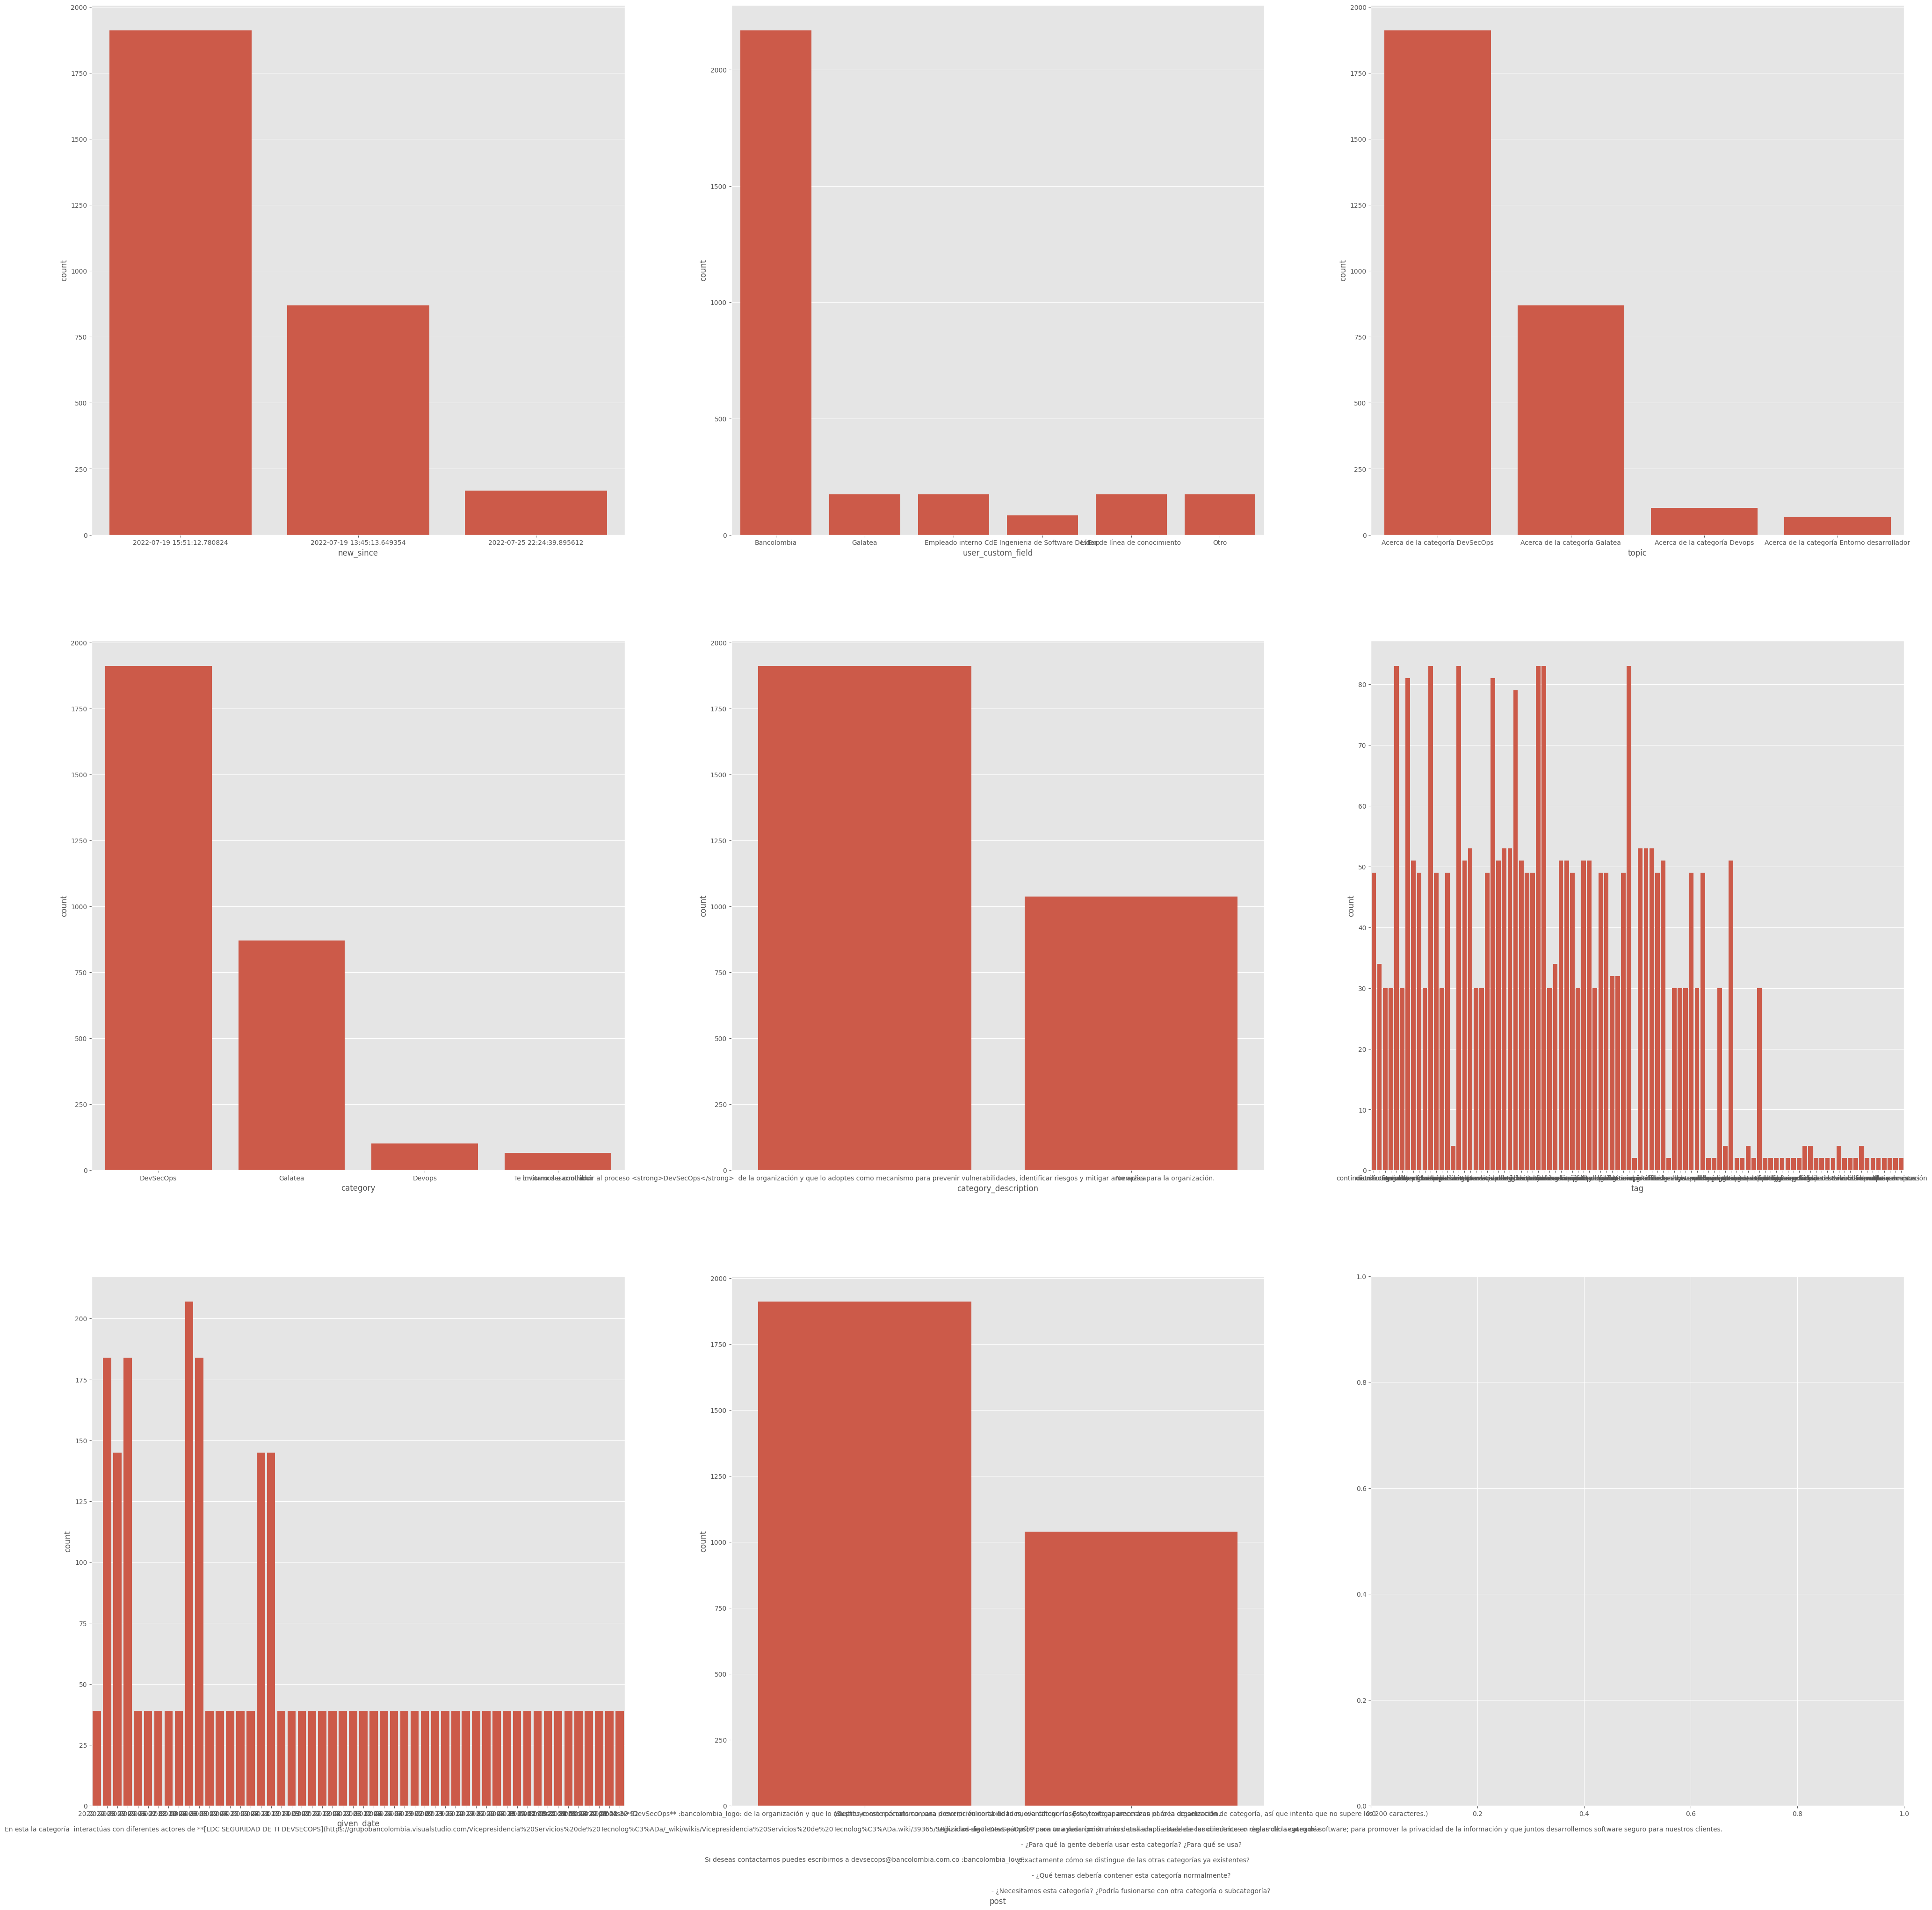

In [60]:
#Visualización de frecuencia de instancias para variables categóricas
plot_multiples_graficas(data,catCols, 3, 3, 'c', None, (50,50))